# Seaborn

In [2]:
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
tips = sns.load_dataset('tips')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## distplot
* kde

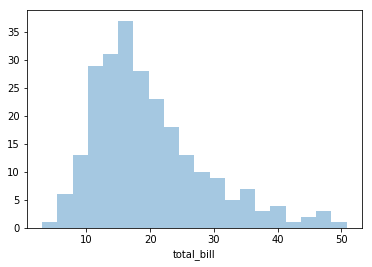

In [6]:
sns.distplot(tips['total_bill'],bins=20,kde=False)

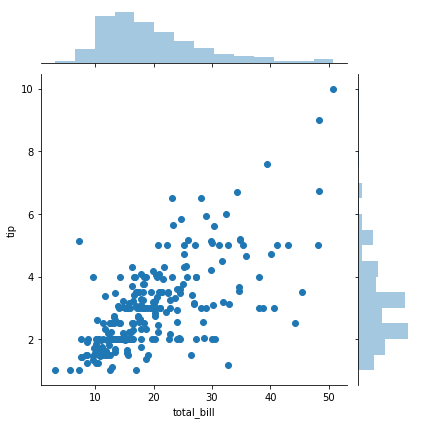

In [13]:
sns.jointplot('total_bill','tip',tips) # kind:defalt scatter

## jointplot
* kind = “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

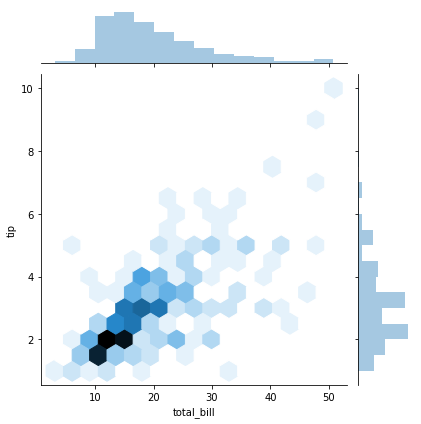

In [7]:
sns.jointplot(x='total_bill',y='tip',data = tips,kind = 'hex')

## pairplot
pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

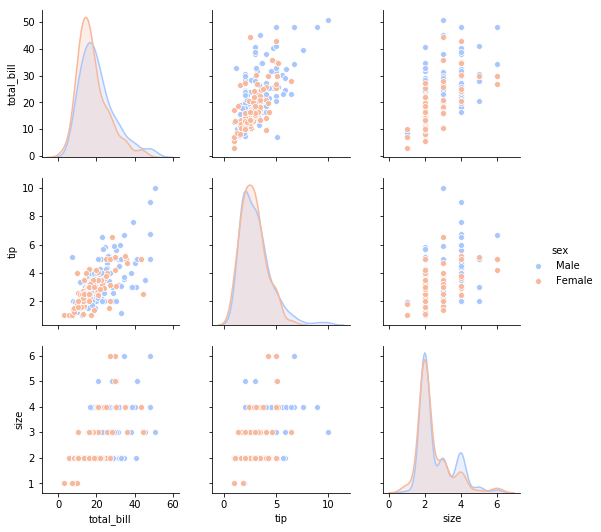

In [8]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

## rugplot

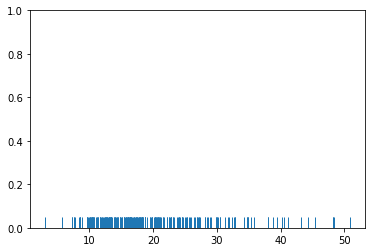

In [17]:
sns.rugplot(tips['total_bill'])

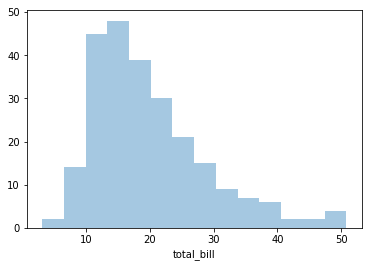

In [9]:
sns.distplot(tips['total_bill'],kde = False)

## kdeplot

In [19]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
dataset = np.random.randn(25)
dataset

array([-0.11355457,  0.00916157, -1.32434737,  0.98105436, -0.74010618,
        0.71062323, -0.26997732, -1.49930381,  0.02265885,  0.9573794 ,
        1.66459519, -0.63666177, -0.33462067, -0.09346459,  0.12757346,
       -0.66852935, -0.63019447, -1.39960021,  0.2960585 ,  0.77761396,
        0.5893811 , -0.63367422,  0.1044361 , -0.25173297, -1.49167212])

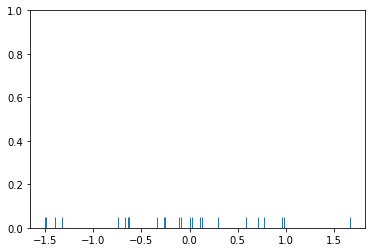

In [14]:
sns.rugplot(dataset)

In [15]:
x_min = dataset.min()-2
x_max = dataset.max()+2
x_axis = np.linspace(x_min,x_max,100)

In [16]:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

In [17]:
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2
bandwidth

0.4490770093412157

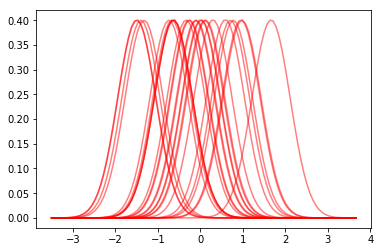

In [20]:
kernel_list = []

for data_point in dataset:
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color= 'red',alpha = 0.5)

Text(0.5, 0.98, 'Sum of the Basis Functions')

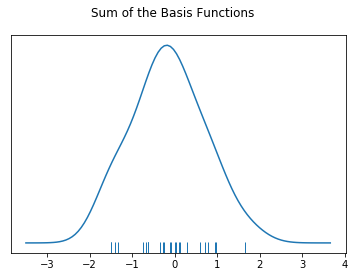

In [22]:
sum_of_kde = np.sum(kernel_list,axis=0)
fig = plt.plot(x_axis,sum_of_kde)
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle("Sum of the Basis Functions")

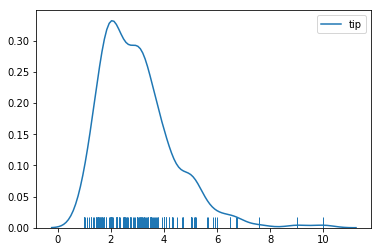

In [25]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

# Categorical Plots
* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

## barplot and countplot

In [40]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


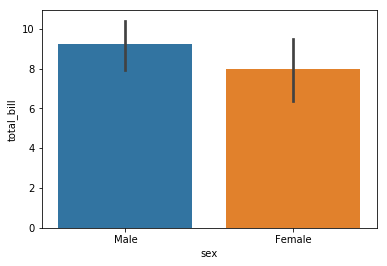

In [31]:
sns.barplot(x = 'sex',y = 'total_bill',data = tips,estimator=np.std)

## countplot
only set the x value

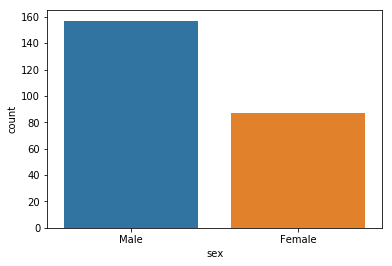

In [43]:
sns.countplot(x='sex',data = tips)

## boxplot

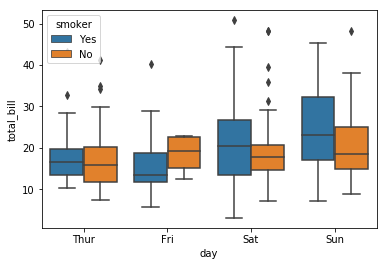

In [45]:
sns.boxplot(x='day',y='total_bill',data = tips,hue = 'smoker')

## violinplot

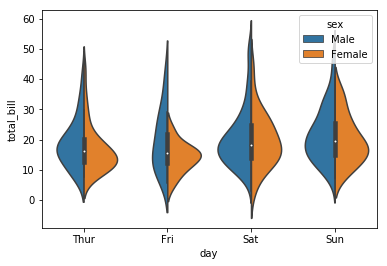

In [49]:
sns.violinplot('day','total_bill','sex',data = tips,split=True)

## stripplot
* jitter = True: add more bias

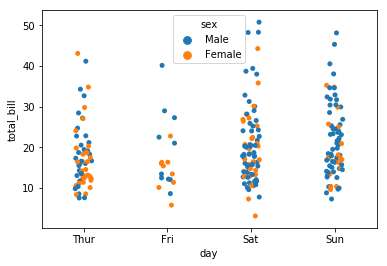

In [54]:
sns.stripplot('day','total_bill','sex',tips,jitter=True)

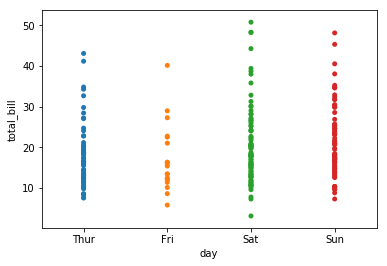

In [58]:
sns.stripplot('day','total_bill',None,tips,jitter=False)

## swarmplot
dont use swarmplot on big dataset

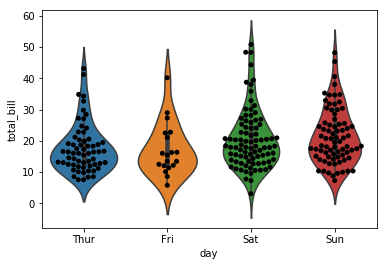

In [62]:
sns.violinplot('day',"total_bill",data = tips)
sns.swarmplot('day',"total_bill",data = tips,color = 'black')

## Matrix plots